In [1]:
import os
import numpy as np
import glob
import h5py
from igibson.utils.vi_log_util import VIDataLib
from itertools import product
import matplotlib.pyplot as plt 


 _   _____  _  _
(_) / ____|(_)| |
 _ | |  __  _ | |__   ___   ___   _ __
| || | |_ || || '_ \ / __| / _ \ | '_ \
| || |__| || || |_) |\__ \| (_) || | | |
|_| \_____||_||_.__/ |___/ \___/ |_| |_|



In [2]:
data_path = "c:/Users/capri28/Documents/ig2/igibson/data/vi_data/demo"
vis = [f"{i}_{j}" for i in ["cataract", "amd", "glaucoma", "presbyopia", "myopia"] for j in [1, 2, 3]] + ["normal_1"]
tasks = ["catch", "navigate", "place", "slice", "throw", "wipe"]
id = 3

logfiles = {}
for task in tasks:
    for vi in vis:
        logfiles[f"{task}_{vi}"] = {}
        for i, path in enumerate(glob.glob(rf"{data_path}/{id}/{task}/{vi}/*/*.hdf5")):
            logfiles[f"{task}_{vi}"][i] = path

In [3]:
vi_data = VIDataLib(logfiles)

## Eye tracking data

In [ ]:
eye_data = vi_data.get_gaze_movement()

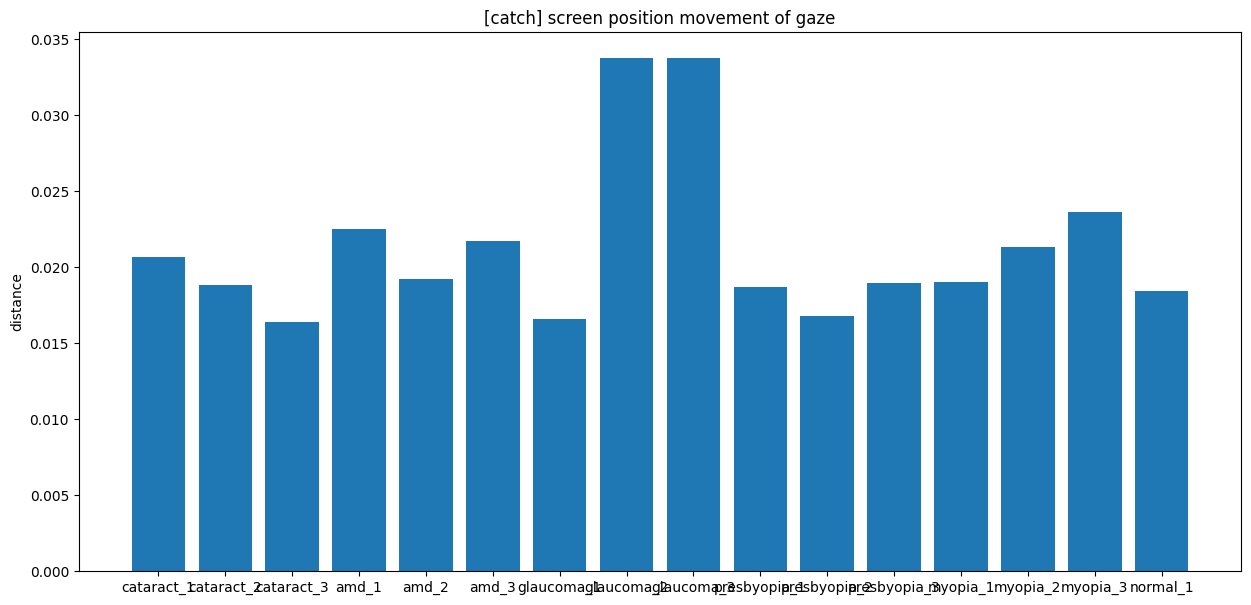

c:\Users\capri28\mambaforge\envs\igvi\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\capri28\mambaforge\envs\igvi\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


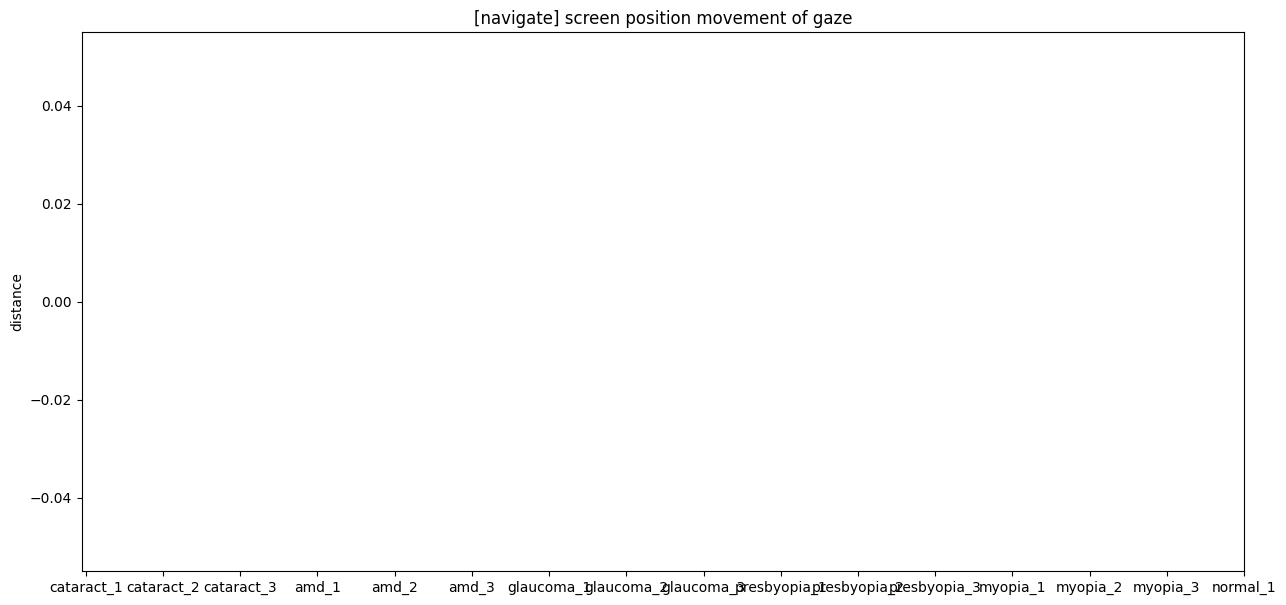

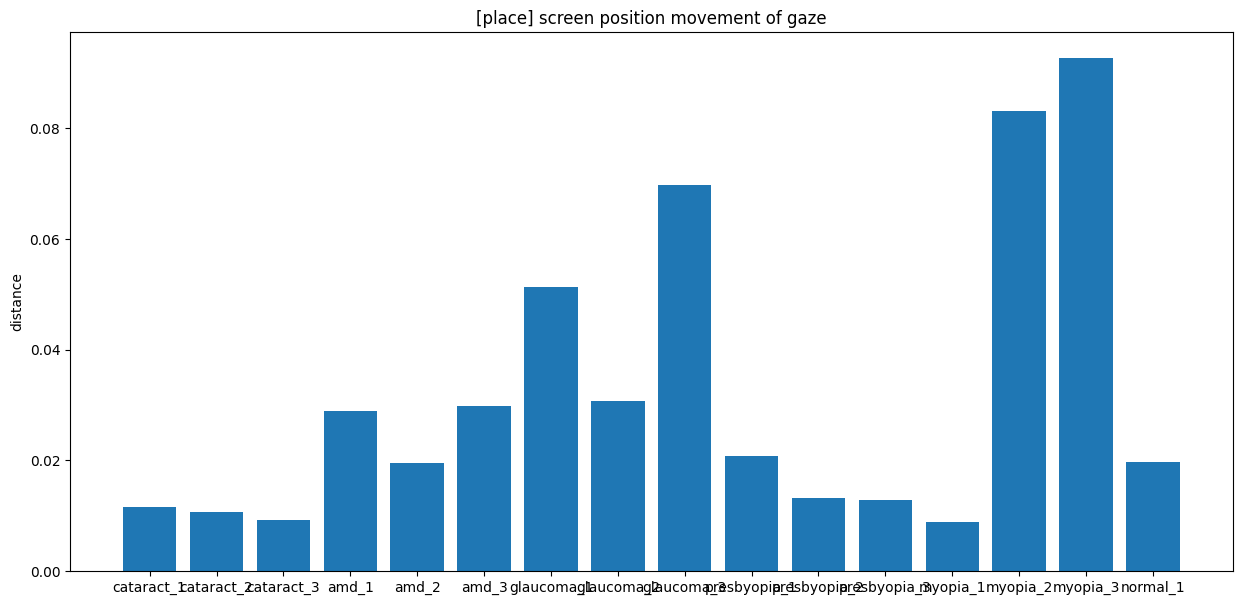

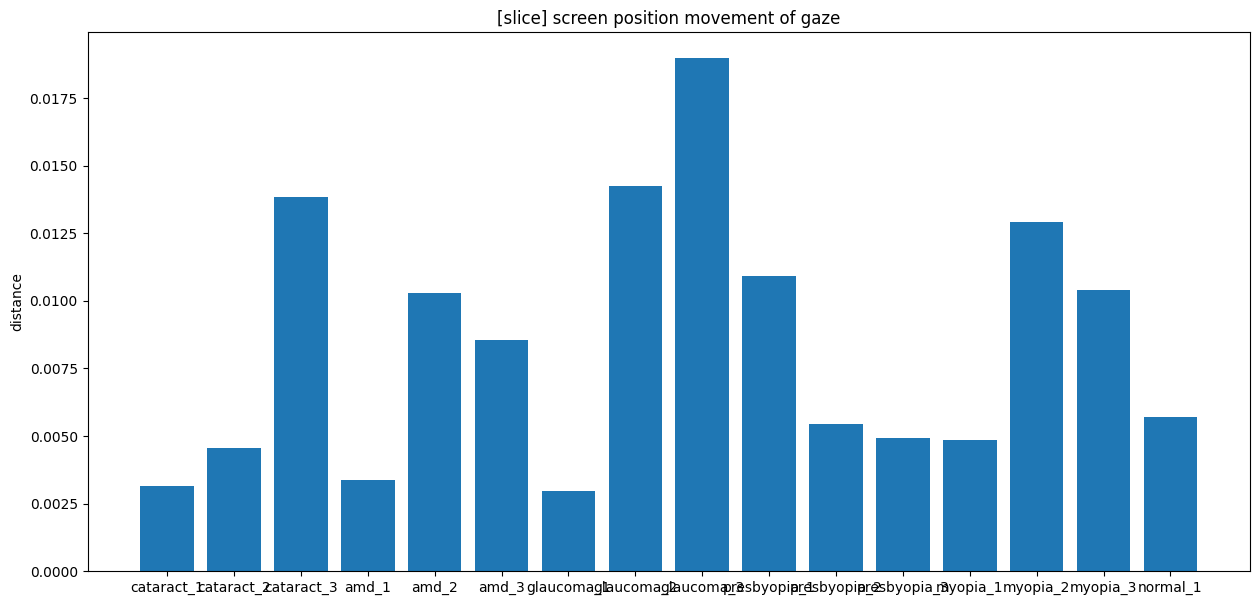

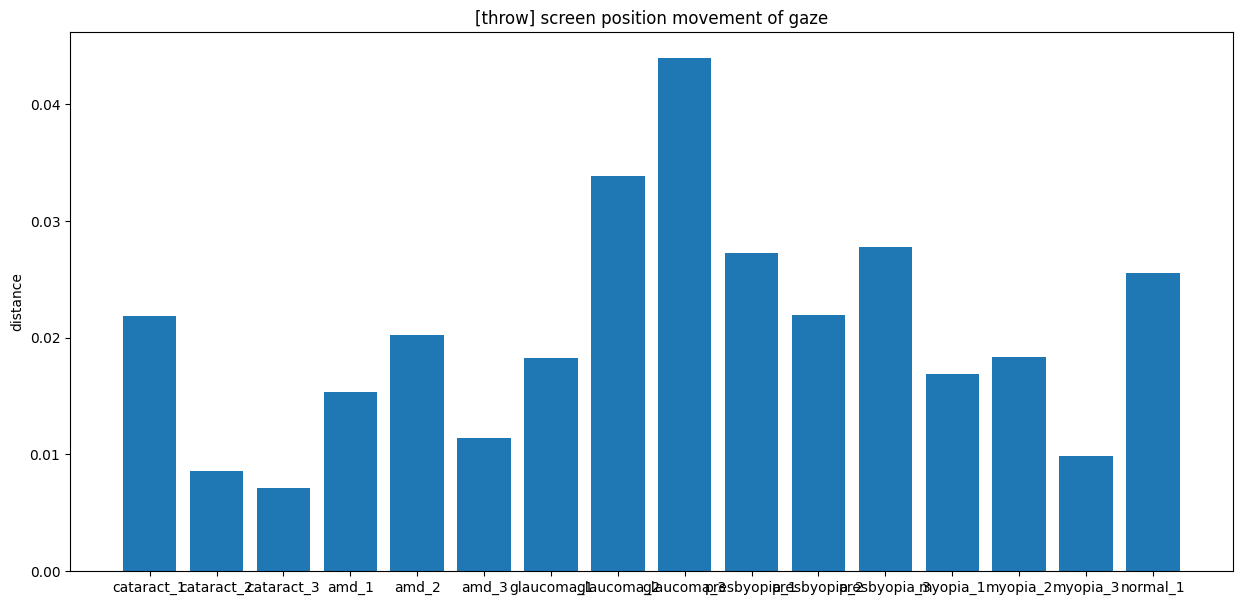

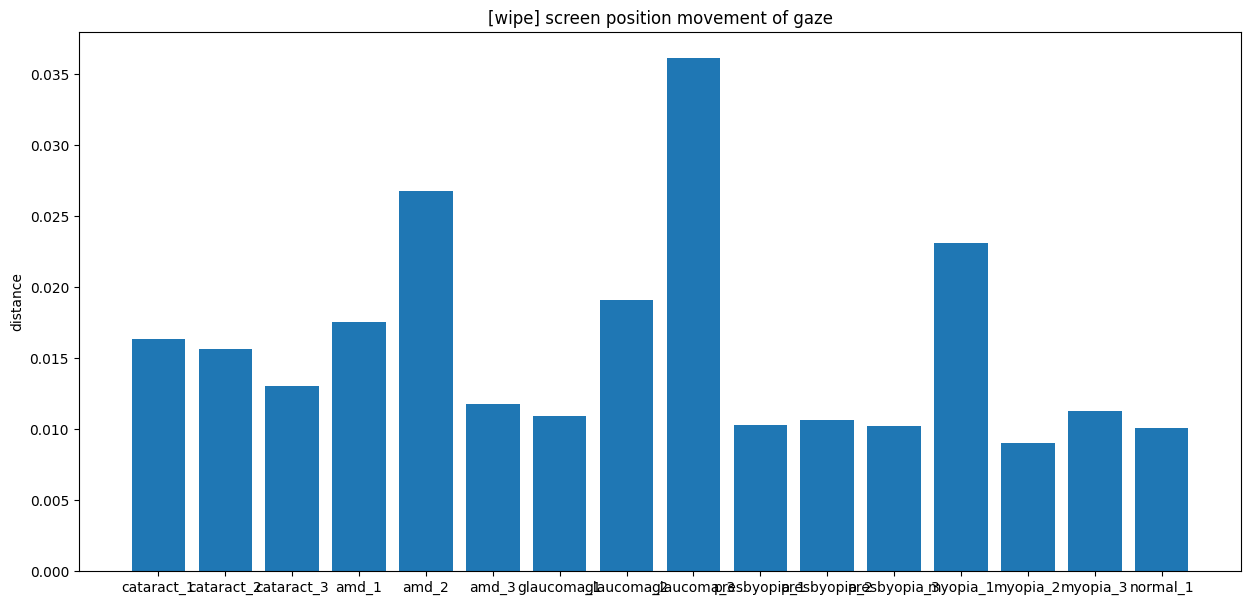

In [ ]:
avg_eye_data = {task: {} for task in tasks}
for task in tasks:
    for vi in vis:
        avg_eye_data[task][vi] = np.mean(list(eye_data[f"{task}_{vi}"].values()))
    vi_data.bar_plot(data=list(avg_eye_data[task].values()), tick_label=vis, title=f"[{task}] screen position movement of gaze", ylabel="distance")

## Task completion time

In [ ]:
completion_time = vi_data.get_attr(key="/metadata/task_completion_time")

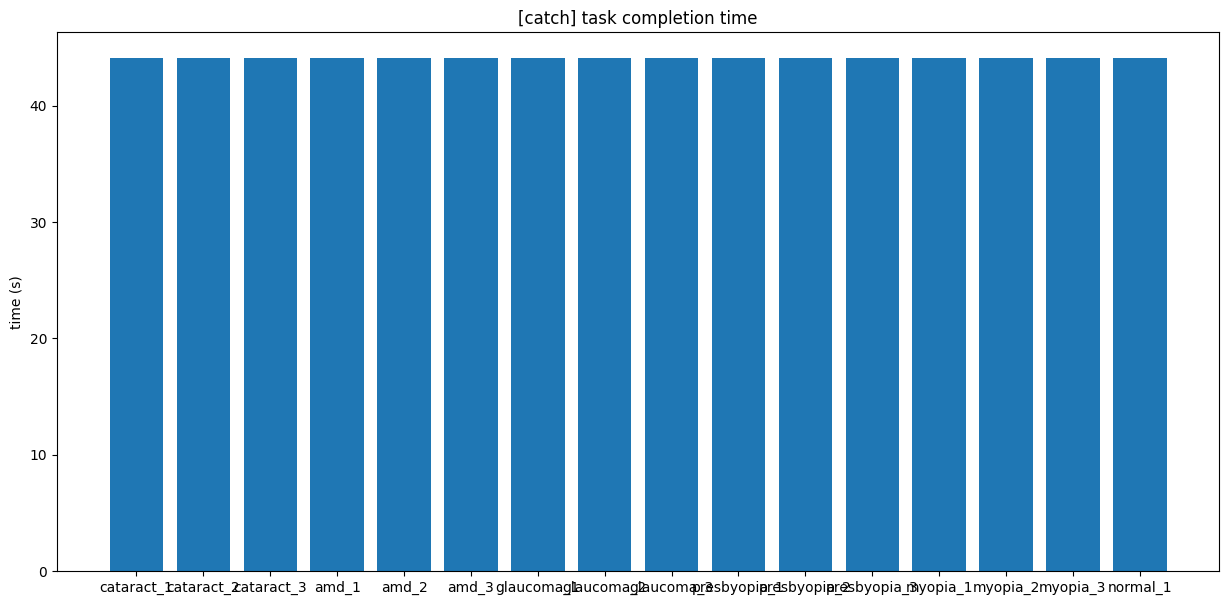

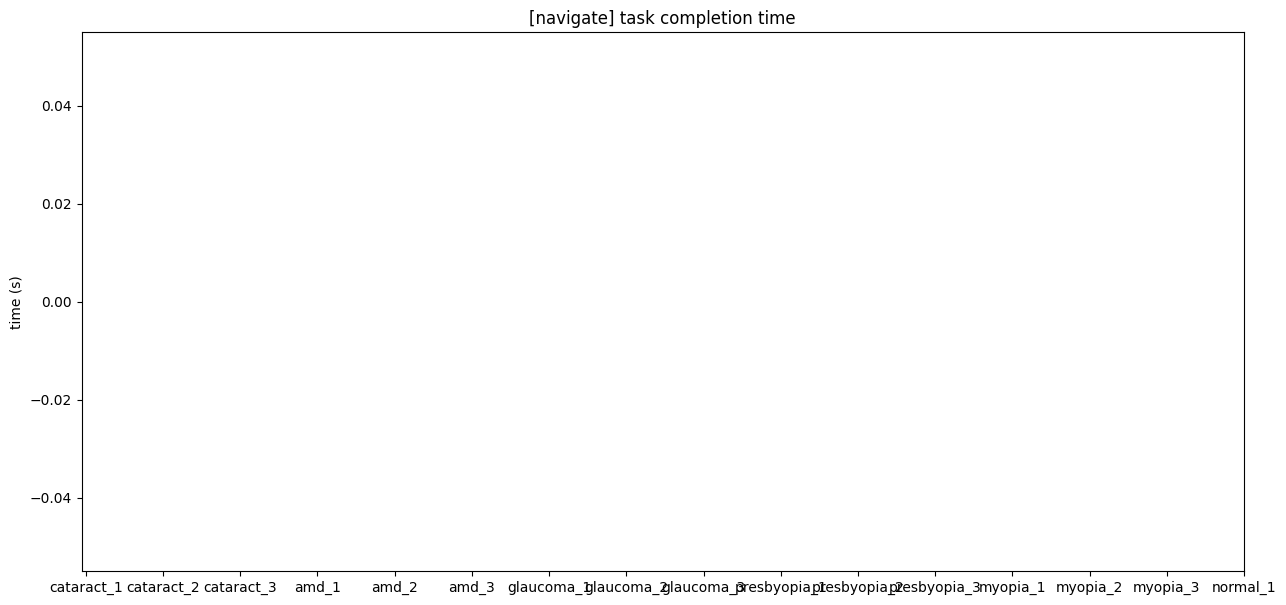

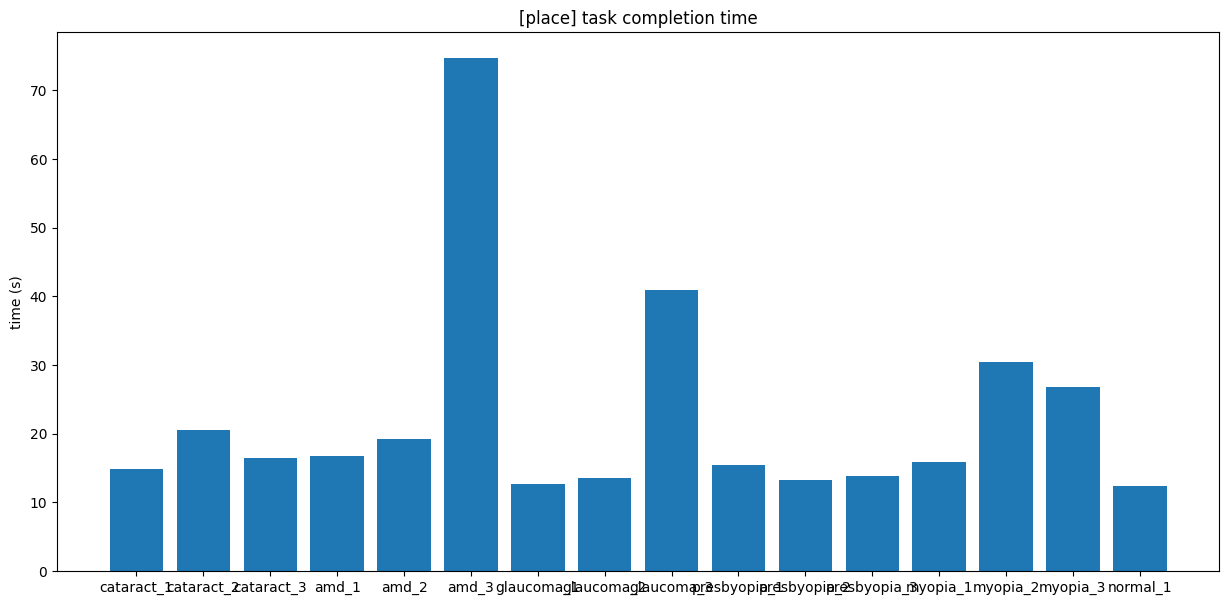

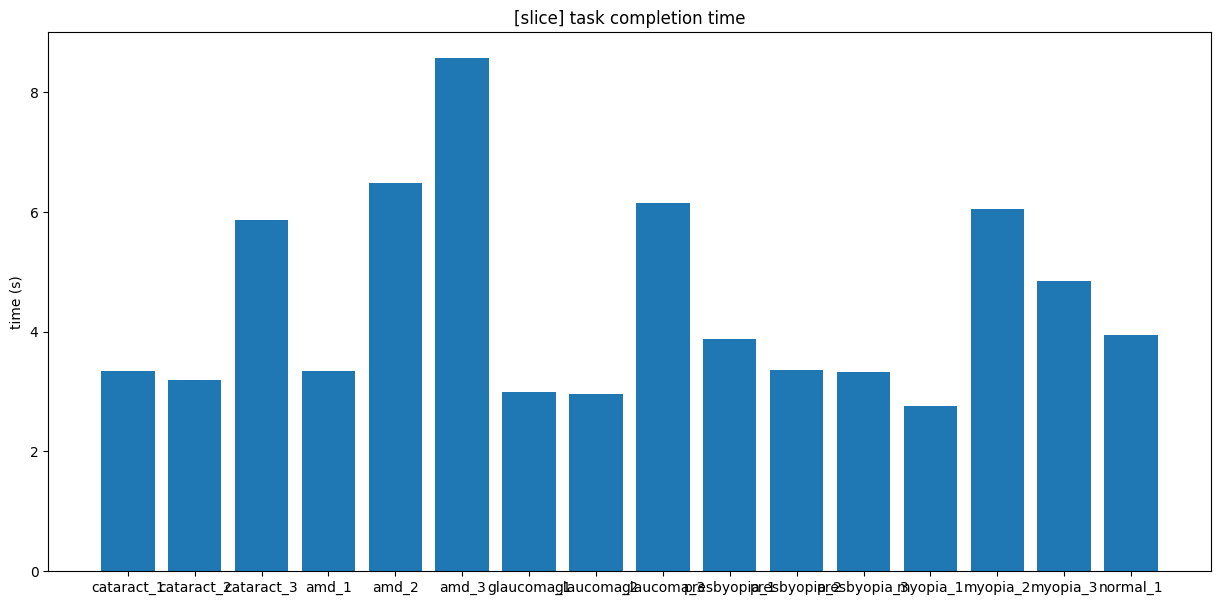

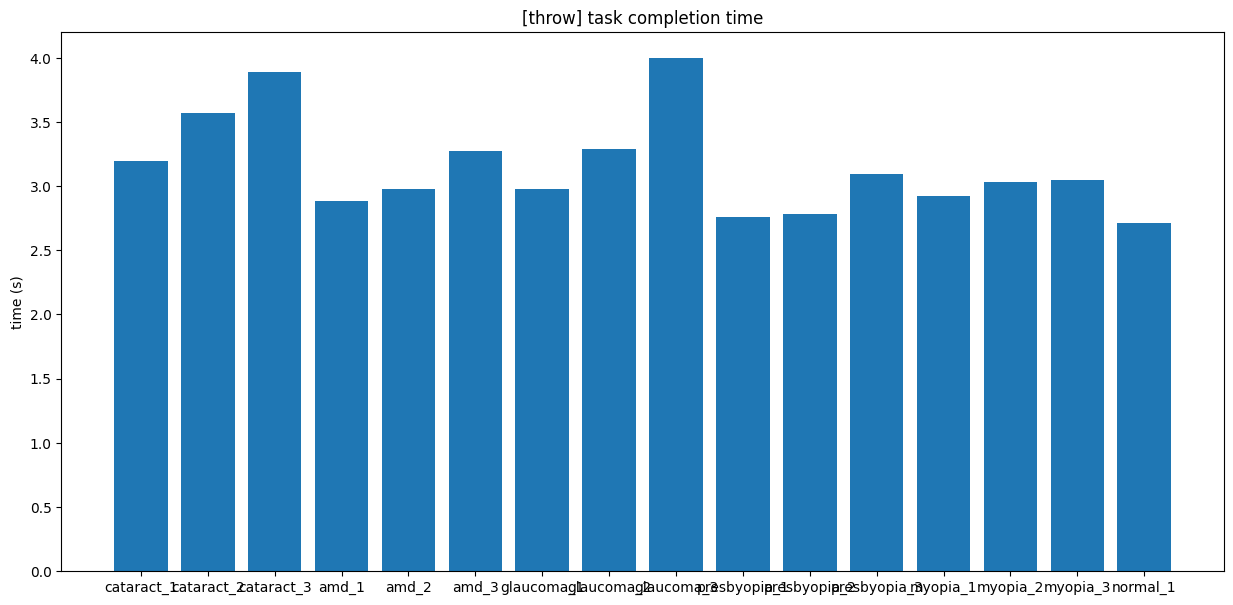

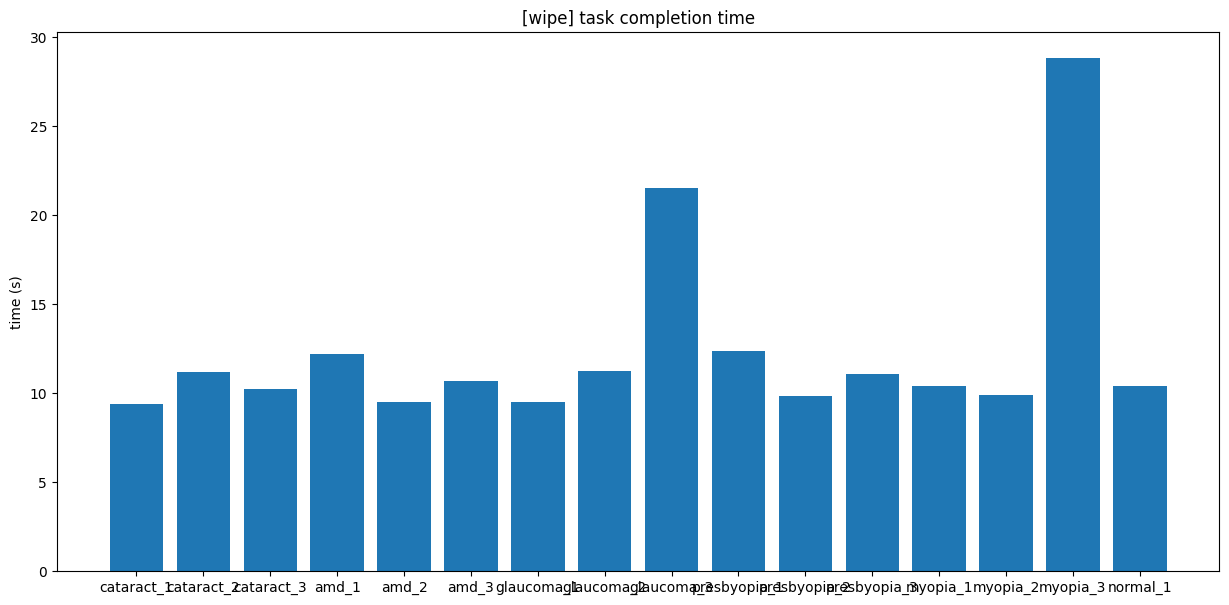

In [ ]:
avg_completion_time = {task: {} for task in tasks}
for task in tasks:
    for vi in vis:
        avg_completion_time[task][vi] = np.mean(list(completion_time[f"{task}_{vi}"].values()))
    vi_data.bar_plot(data=list(avg_completion_time[task].values()), tick_label=vis, title=f"[{task}] task completion time", ylabel="time (s)")

## Head Movements

In [ ]:
hmd_translation_data = vi_data.get_device_translation(device="hmd", method=np.sum)
hmd_rotation_data = vi_data.get_device_rotation(device="hmd", method=np.sum)

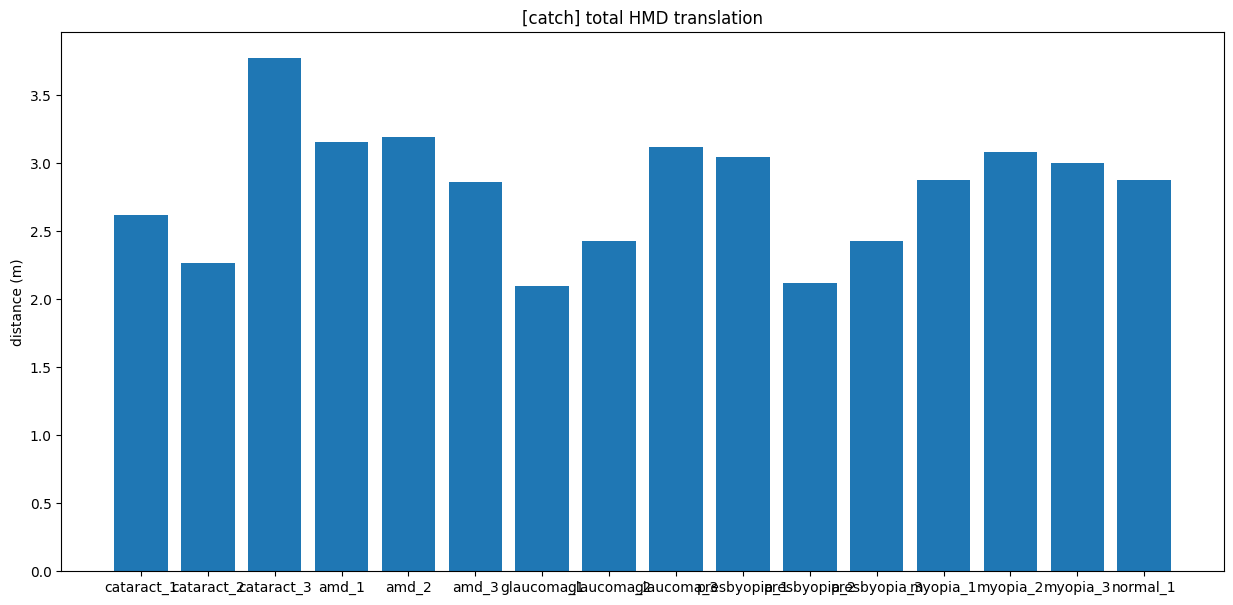

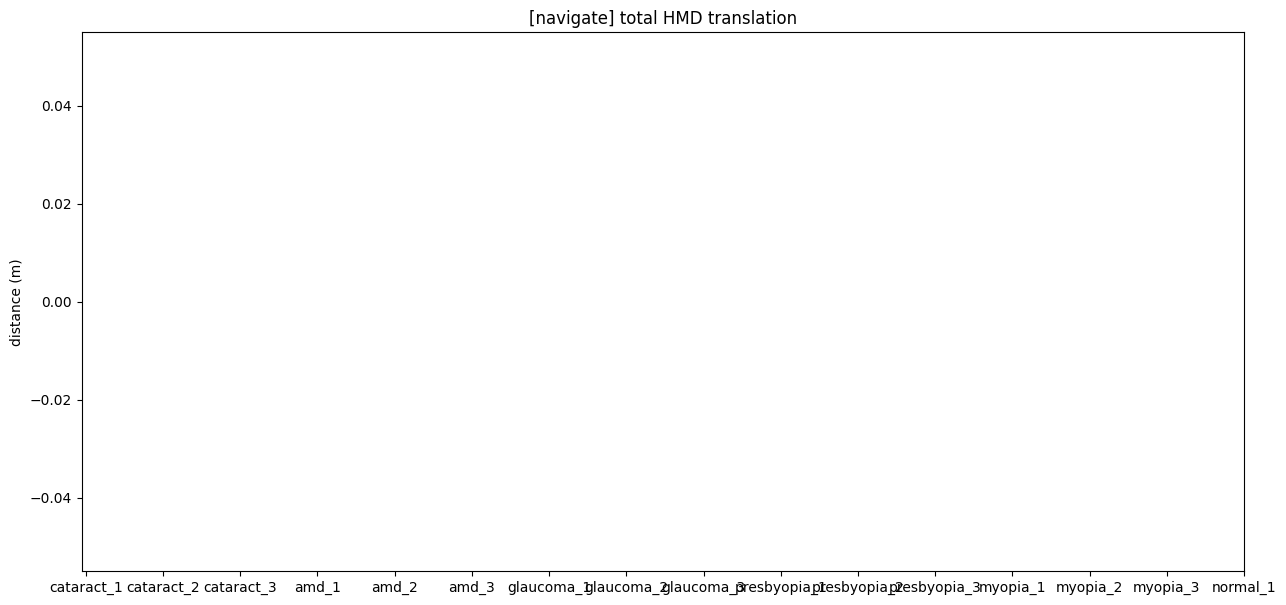

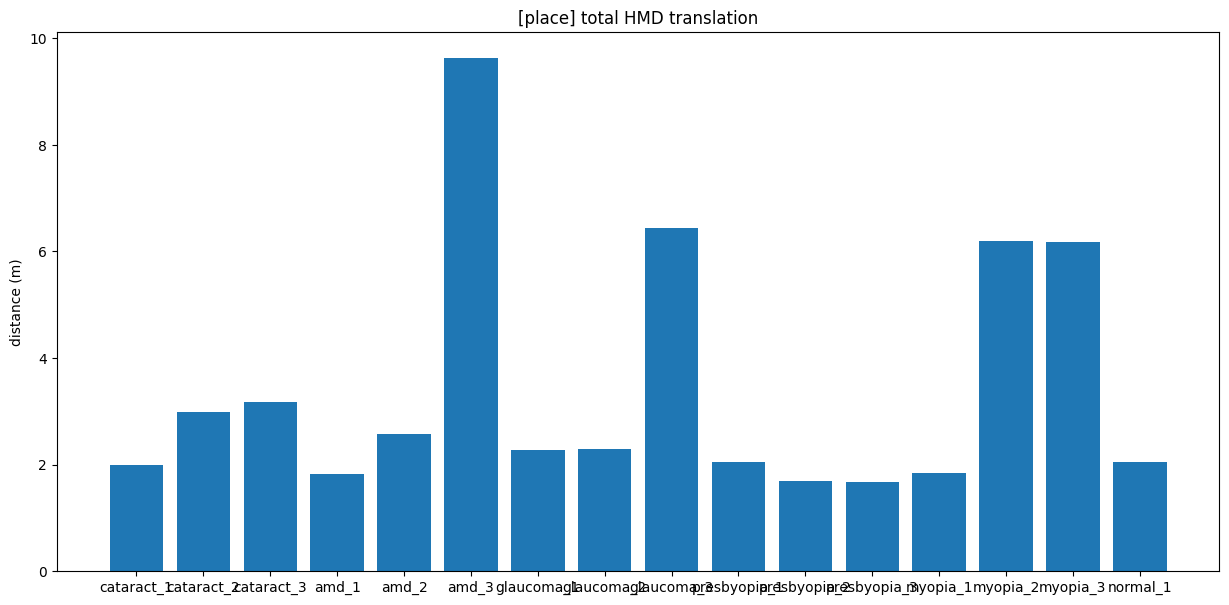

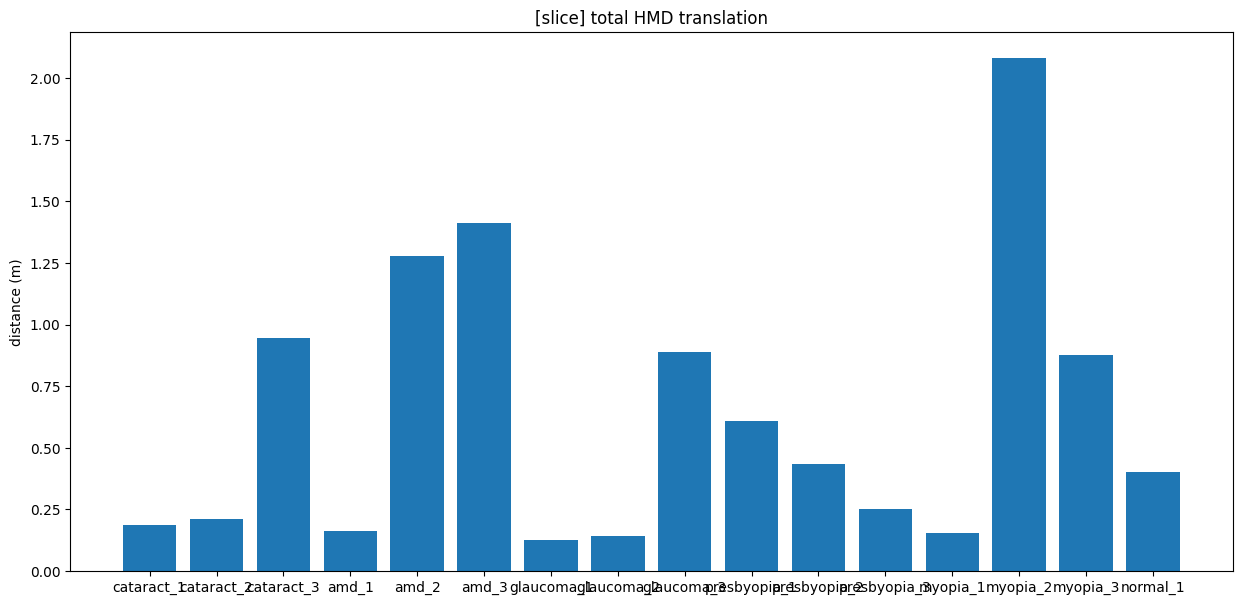

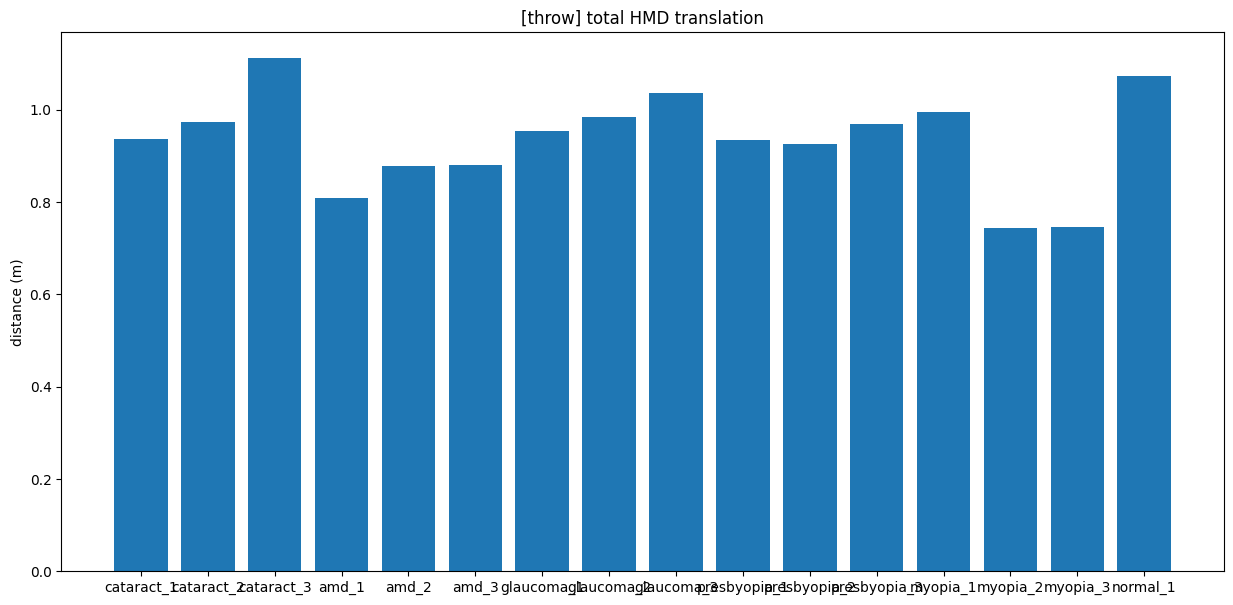

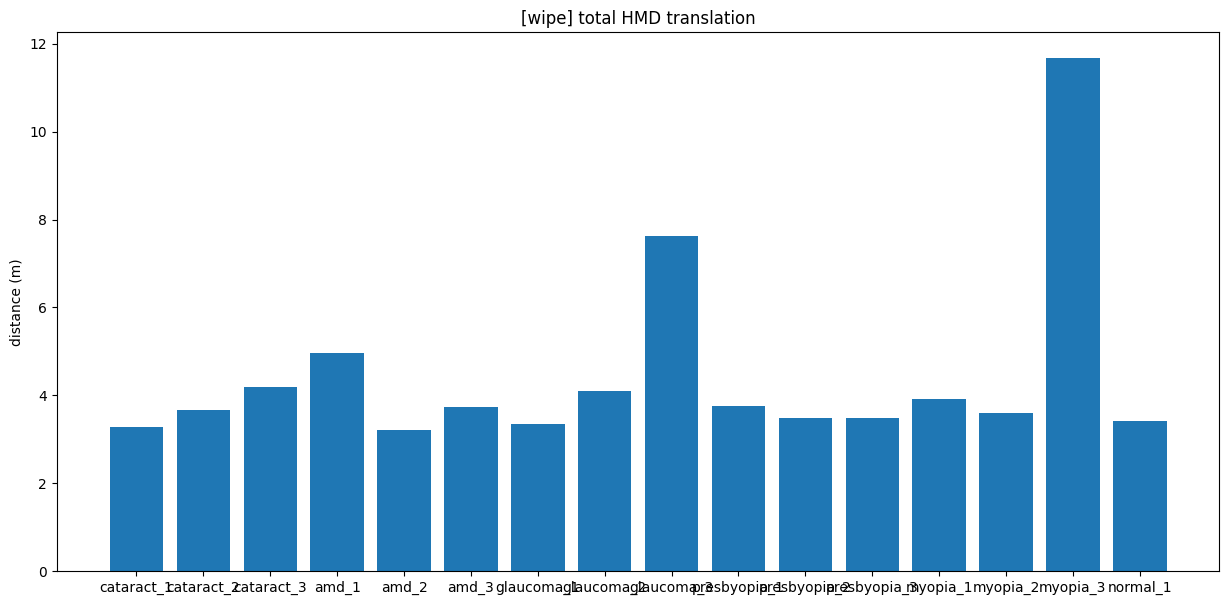

In [ ]:
avg_hmd_translation_data = {task: {} for task in tasks}
for task in tasks:
    for vi in vis:
        avg_hmd_translation_data[task][vi] = np.mean(list(hmd_translation_data[f"{task}_{vi}"].values()))
    vi_data.bar_plot(data=list(avg_hmd_translation_data[task].values()), tick_label=vis, title=f"[{task}] total HMD translation", ylabel="distance (m)")

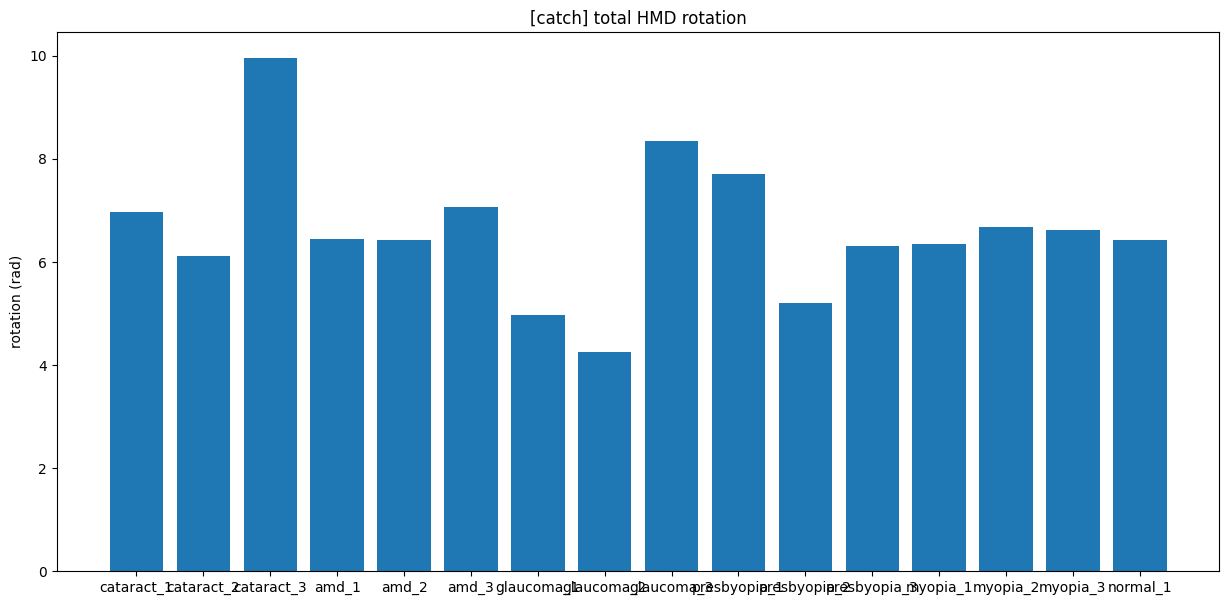

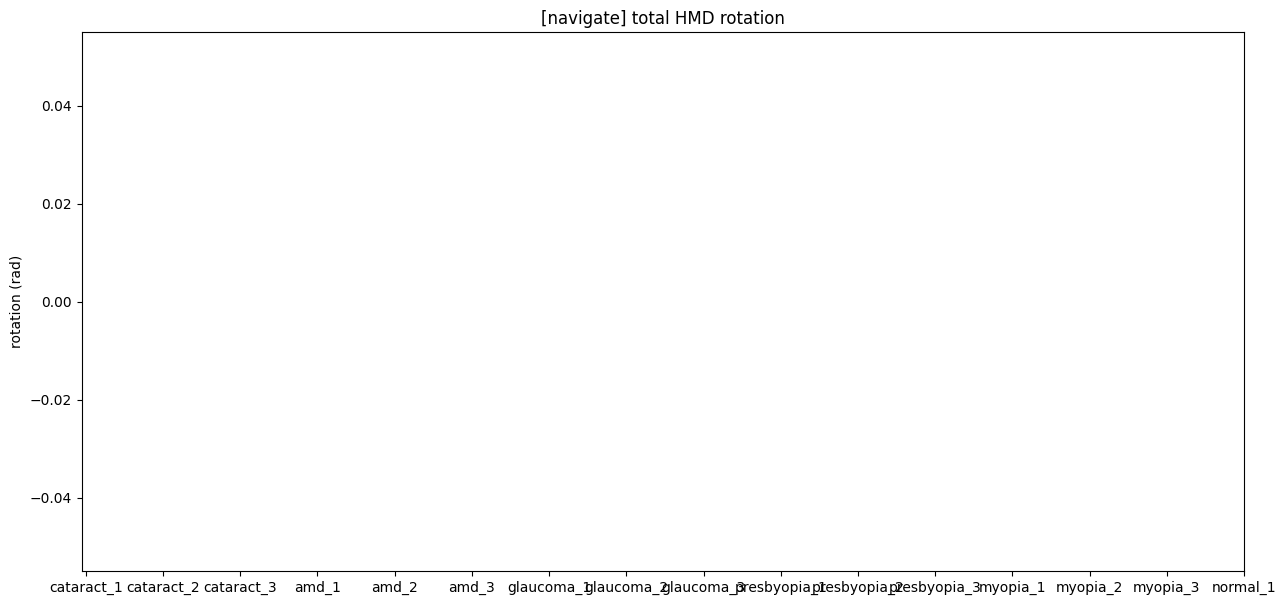

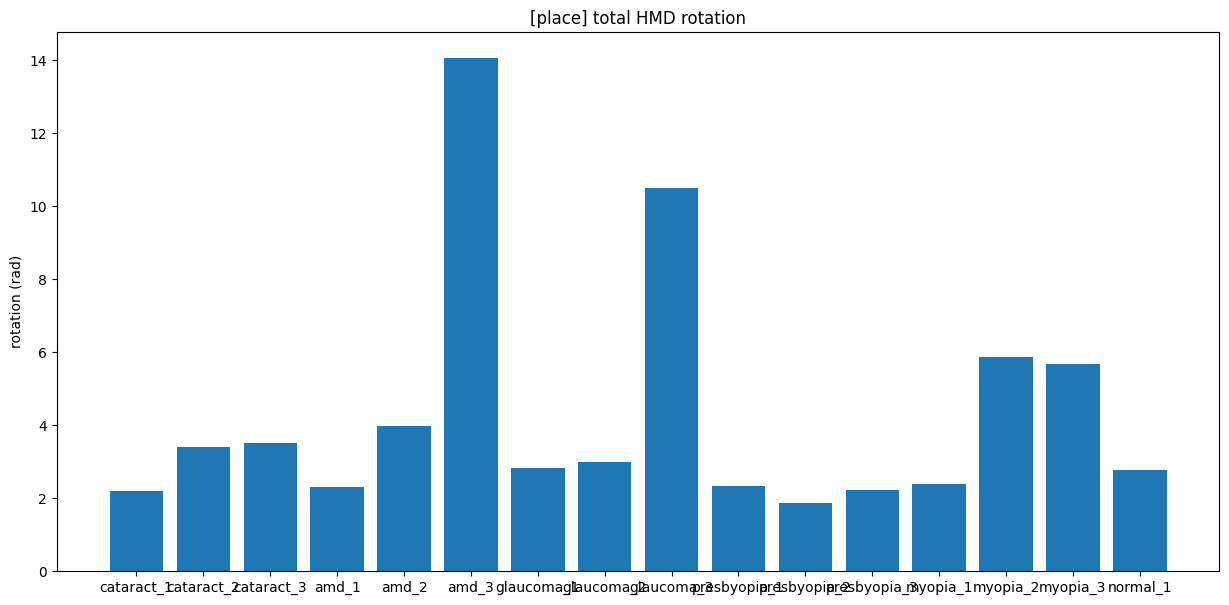

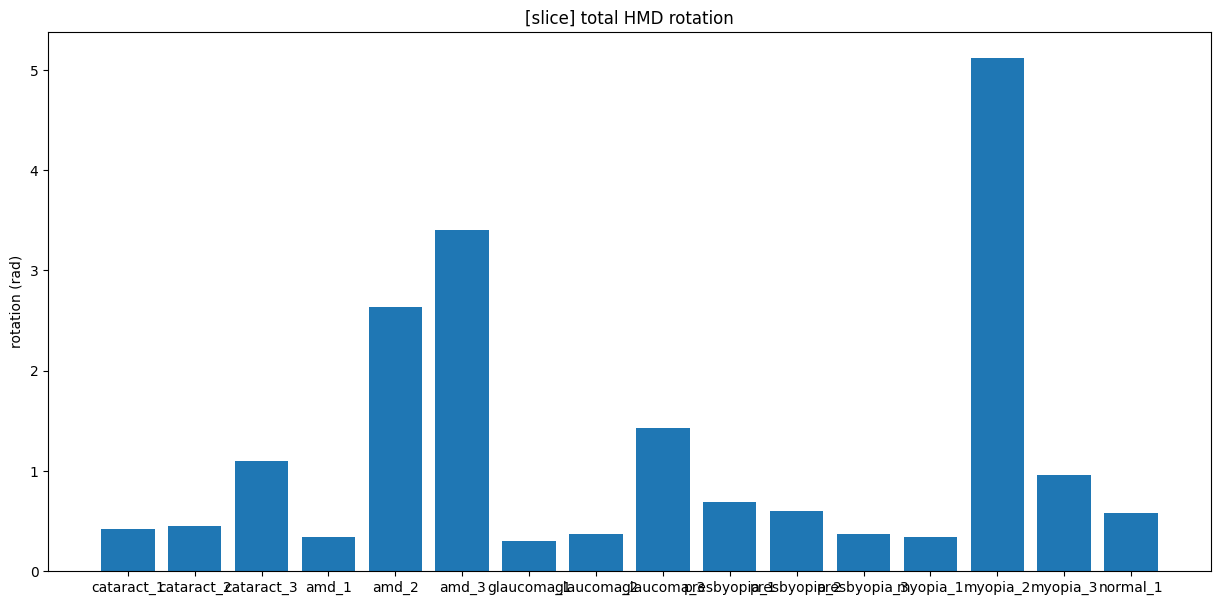

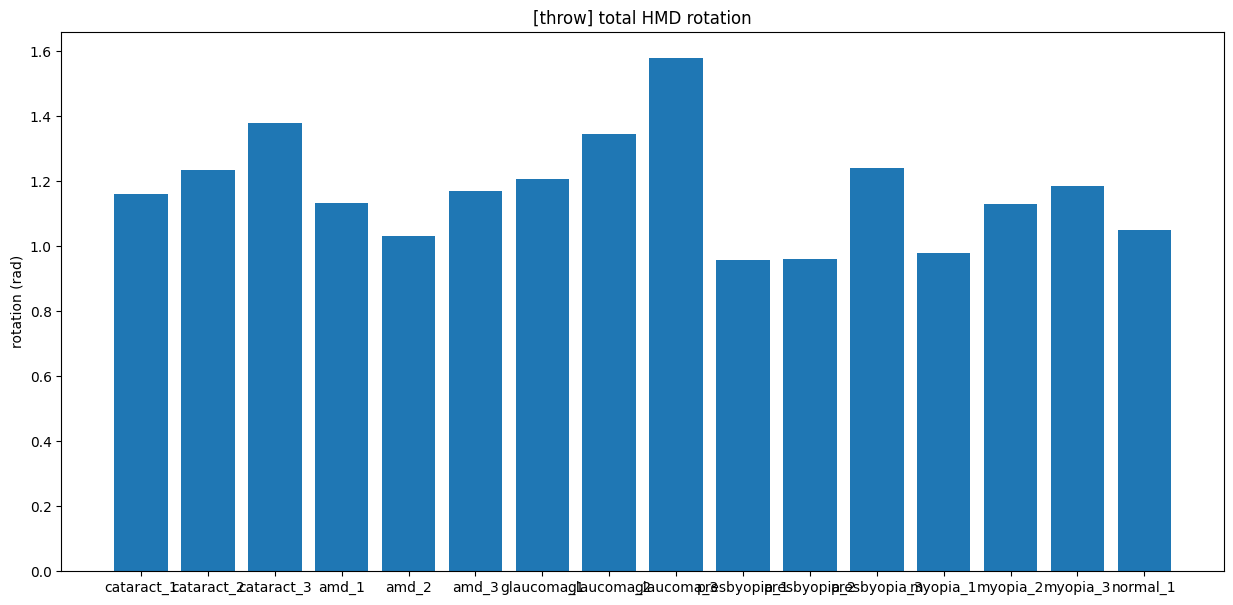

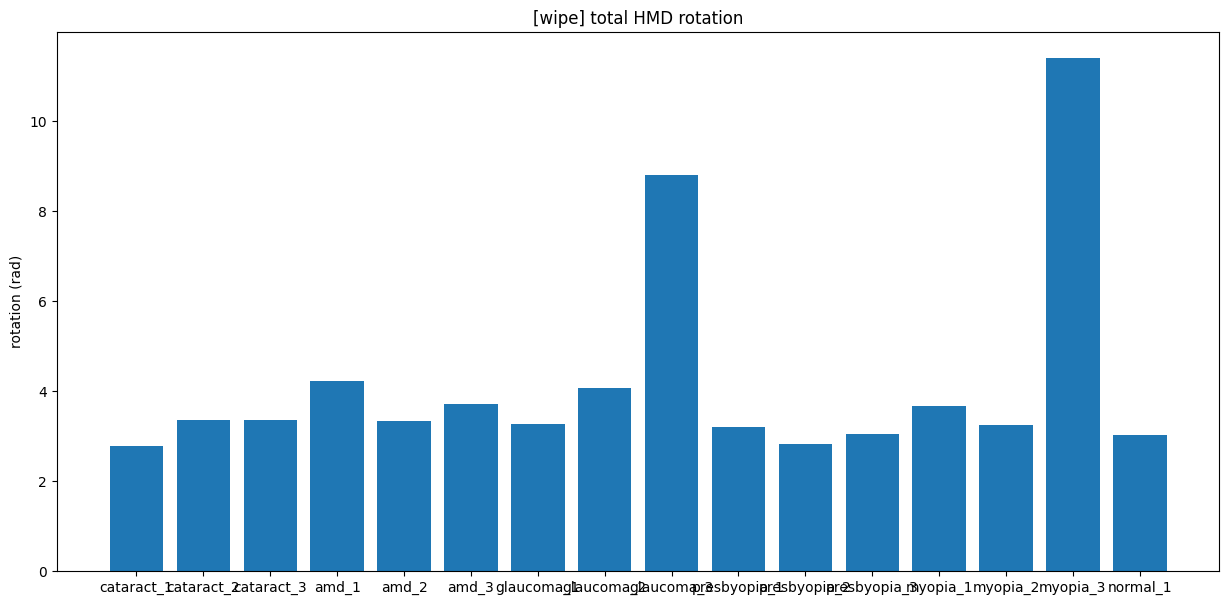

In [ ]:
avg_hmd_rotation_data = {task: {} for task in tasks}
for task in tasks:
    for vi in vis:
        avg_hmd_rotation_data[task][vi] = np.mean(list(hmd_rotation_data[f"{task}_{vi}"].values()))
    vi_data.bar_plot(data=list(avg_hmd_rotation_data[task].values()), tick_label=vis, title=f"[{task}] total HMD rotation", ylabel="rotation (rad)")

## Others

### Success Rate (SR) for catch and throw

In [ ]:
sr_task = ["catch", "throw"]
sr = vi_data.get_attr(key="/metadata/success", cond_id=[f"{task}_{vi}" for task, vi in product(sr_task, vis)])

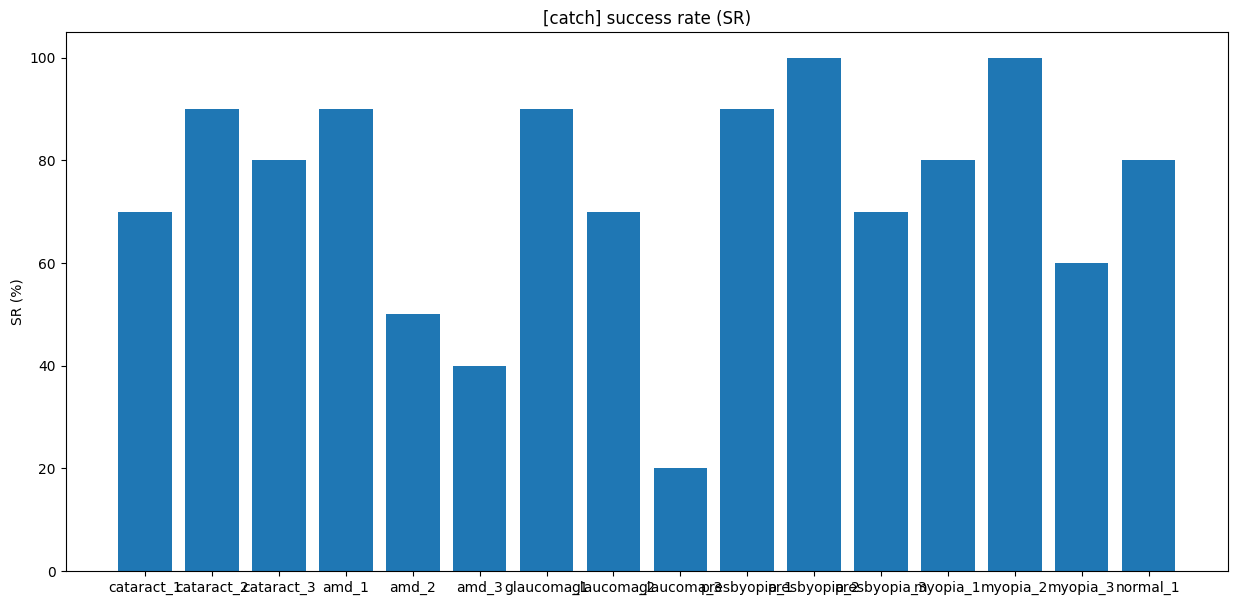

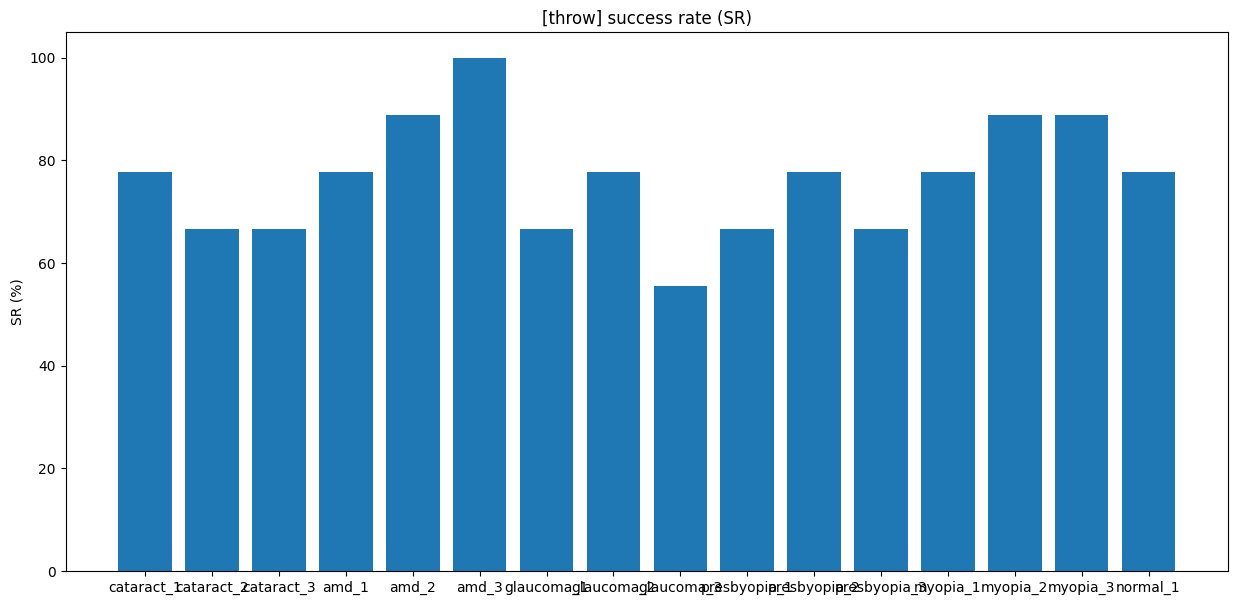

In [ ]:
avg_sr = {task: {} for task in tasks}
for task in sr_task:
    for vi in vis:
        avg_sr[task][vi] = np.mean(list(sr[f"{task}_{vi}"].values()))    
    vi_data.bar_plot(data=np.array(list(avg_sr[task].values()))*100, tick_label=vis, title=f"[{task}] success rate (SR)", ylabel="SR (%)")

### Fixation variation for catch

In [ ]:
# TODO

### Distance between ball and basket for throw

In [ ]:
# from analysis, the object id of ball and basket are 10, 11 respectively
# We consider the ball hits the ground if its z value is < 0.05
avg_distance = {vi : [] for vi in vis}
for vi in vis:
    for trial_id in vi_data.hfs[f"throw_{vi}"].keys():
        sphere_pos = vi_data.hfs[f"throw_{vi}"][trial_id]["physics_data/10/position"]
        basket_pos = vi_data.hfs[f"throw_{vi}"][trial_id]["physics_data/11/position"]
        bounce_time = np.argmax(sphere_pos[:, 2] < 0.05)
        avg_distance[vi].append(np.linalg.norm(sphere_pos[bounce_time] - basket_pos[bounce_time]))
    avg_distance[vi] = np.mean(avg_distance[vi])
vi_data.bar_plot(data=avg_distance.values(), tick_label=vis, title=f"[throw] distance between ball's bounce point and basket", ylabel="distance(m)")

KeyboardInterrupt: 

### Total movement of all objects of place

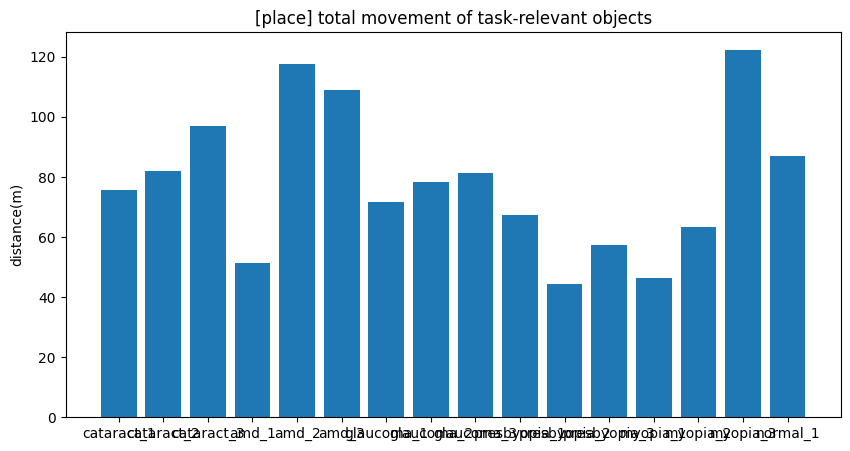

In [ ]:
# from analysis, the object id of baskets and cubes are 12-20
total_obj_movements = vi_data.get_object_translation(object_id=range(13, 21), cond_id=[f"place_{vi}" for vi in vis], method=np.sum)
avg_obj_movement = {task: {} for task in tasks}
for vi in vis:
    avg_obj_movement[task][vi] = np.mean(list(total_obj_movements[f"place_{vi}"].values()))    
vi_data.bar_plot(data=np.array(list(avg_obj_movement[task].values()))*100, tick_label=vis, title=f"[place] total movement of task-relevant objects", ylabel="distance(m)")

### collisions and trajectory length for navigate

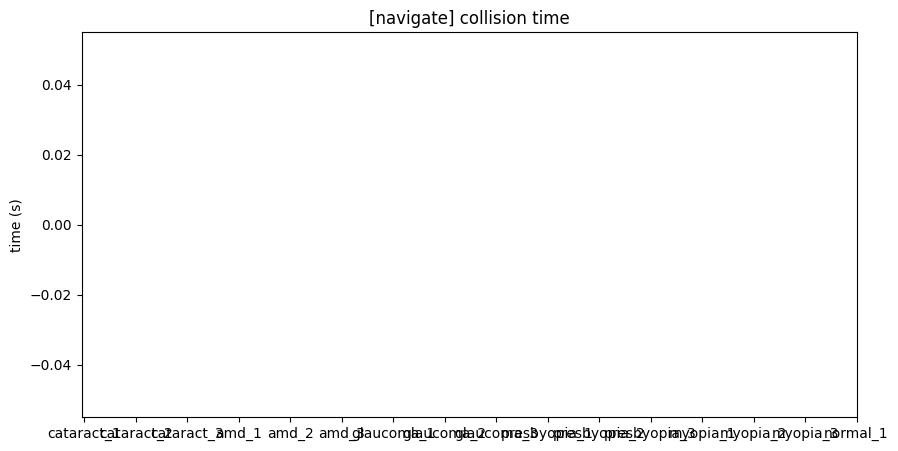

In [ ]:
collisions = vi_data.get_data(key="/vr/vr_event_data/collisions", cond_id=[f"navigate_{vi}" for vi in vis], method=lambda x: np.sum(np.any(x, axis=1)))
avg_collisions = {}
for vi in vis:
    for i in range(5):
        avg_collisions[f"navigate_{vi}"] = np.mean(list(collisions[f"navigate_{vi}"].values()))
vi_data.bar_plot(data=list(avg_collisions.values()), tick_label=vis, title="[navigate] collision time", ylabel="time (s)")

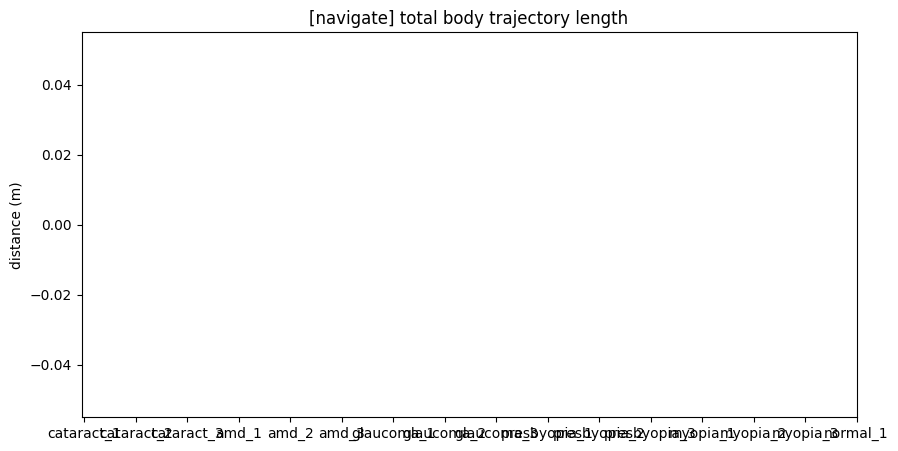

In [ ]:
torso_translation_data = vi_data.get_device_translation(cond_id=[f"navigate_{vi}" for vi in vis], method=np.sum)
avg_torso_translation_data = {task: {} for task in tasks}
for vi in vis:
    avg_torso_translation_data[task][vi] = np.mean(list(torso_translation_data[f"navigate_{vi}"].values()))
vi_data.bar_plot(data=list(avg_torso_translation_data[task].values()), tick_label=vis, title="[navigate] total body trajectory length", ylabel="distance (m)")

### movement of dominant hand for place and slice

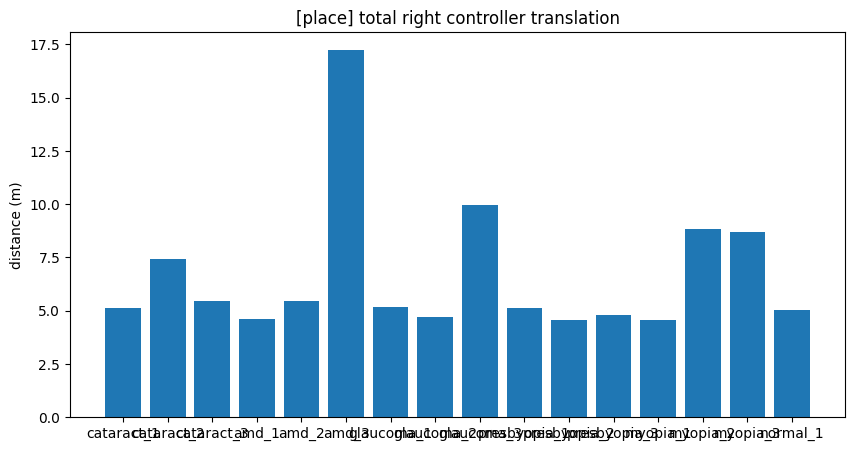

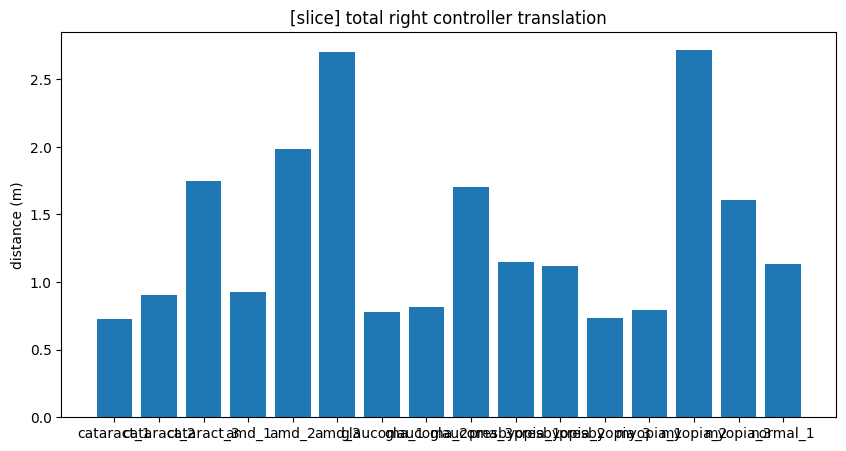

In [ ]:
dh_task = ["place", "slice"]
hand_data = vi_data.get_device_translation(device="right_controller", cond_id=[f"{task}_{vi}" for task, vi in product(dh_task, vis)], method=np.sum)
avg_hand_data = {task: {} for task in dh_task}
for task in dh_task:
    for vi in vis:
        avg_hand_data[task][vi] = np.mean(list(hand_data[f"{task}_{vi}"].values()))
    vi_data.bar_plot(data=list(avg_hand_data[task].values()), tick_label=vis, title=f"[{task}] total right controller translation", ylabel="distance (m)")

### irrelavant objects movement and brushing time for wipe

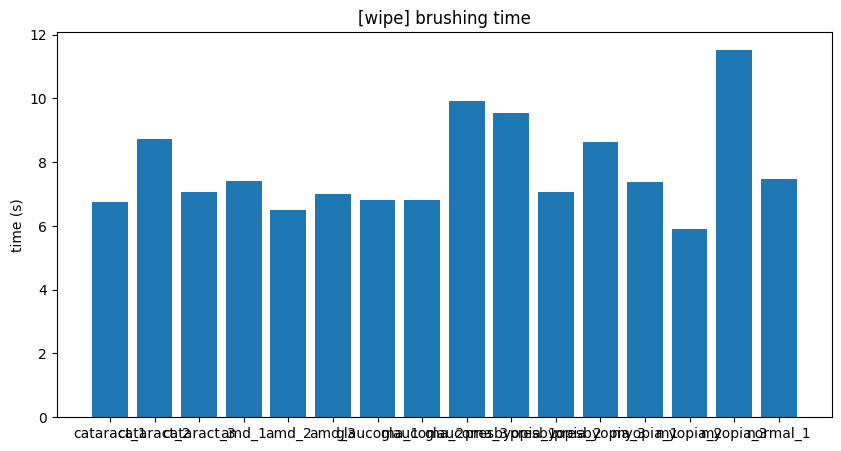

In [ ]:
brushing_time = vi_data.get_attr(key="/task_specific/total_brushing_time", cond_id=[f"wipe_{vi}" for vi in vis])
avg_brushing_time = {}
for vi in vis:
    avg_brushing_time[f"navigate_{vi}"] = np.mean(list(brushing_time[f"wipe_{vi}"].values()))
vi_data.bar_plot(data=list(avg_brushing_time.values()), tick_label=vis, title="[wipe] brushing time", ylabel="time (s)")

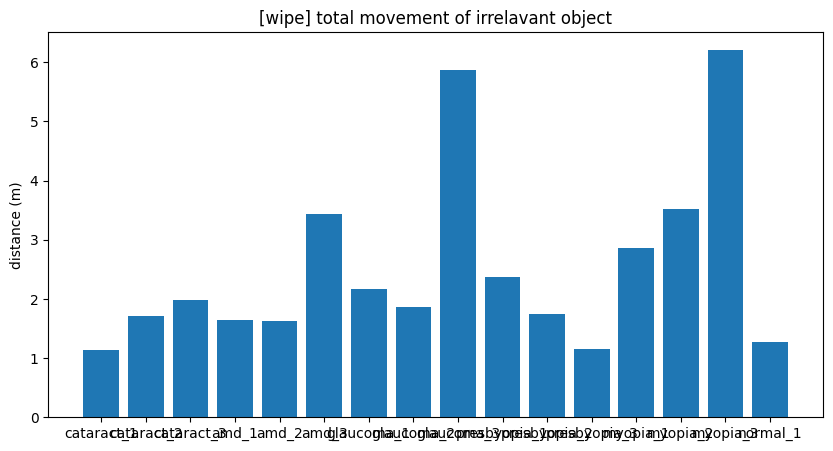

In [ ]:
irre_movement = vi_data.get_data(key="/total_movement_of_irrelavant_objs", cond_id=[f"wipe_{vi}" for vi in vis], method=lambda x:x[-1])
avg_irre_movement = {}
for vi in vis:
    avg_irre_movement[f"wipe_{vi}"] = np.mean(list(irre_movement[f"wipe_{vi}"].values()))
vi_data.bar_plot(data=list(avg_irre_movement.values()), tick_label=vis, title="[wipe] total movement of irrelavant object", ylabel="distance (m)")

## Finally close hdf files

In [ ]:
del vi_data